<img align="right" width="400" src="https://www.fhnw.ch/de/++theme++web16theme/assets/media/img/fachhochschule-nordwestschweiz-fhnw-logo.svg" alt="FHNW Logo">


# Base Classifier with Hyperparameter Tuning

by Fabian Märki

## Summary
The aim of this notebook is to use *hyperparameter tuning* to *automatically* improve the performance of the *Base Classifier*.

## Links
- [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Reasons for Cross Validation](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79)
- [Hyperparameter Tuning](https://neptune.ai/blog/hyperparameter-tuning-in-python-a-complete-guide-2020)

## Videos
- [Hyperparameter Tuning Process](https://www.youtube.com/watch?v=AXDByU3D1hA)
- [Appropriate Scale to Pick Hyperparameters](https://www.youtube.com/watch?v=cSoK_6Rkbfg)

This notebook contains assigments: <font color='red'>Questions are written in red.</font>

<a href="https://colab.research.google.com/github/markif/2024_FS_CAS_NLP_LAB_Notebooks/blob/master/03_b_Base_Classifier_with_Hyperparameter_Tuning.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%%capture

!pip install 'fhnw-nlp-utils>=0.8.0,<0.9.0'

from fhnw.nlp.utils.storage import download
from fhnw.nlp.utils.storage import load_dataframe

import pandas as pd
import numpy as np

In [2]:
from fhnw.nlp.utils.system import set_log_level
from fhnw.nlp.utils.system import system_info

set_log_level()
print(system_info())

OS name: posix
Platform name: Linux
Platform release: 5.13.0-41-generic
Python version: 3.8.10
CPU cores: 6
RAM: 31.13GB total and 25.01GB available
Tensorflow version: 2.8.0
GPU is available
GPU is a NVIDIA GeForce RTX 2070 with Max-Q Design with 8192MiB


In [3]:
%%time
download("https://drive.switch.ch/index.php/s/0hE8wO4FbfGIJld/download", "data/german_doctor_reviews_tokenized.parq")
data = load_dataframe("data/german_doctor_reviews_tokenized.parq")
data.shape

CPU times: user 12.4 s, sys: 1.66 s, total: 14 s
Wall time: 10.3 s


(350087, 10)

In [4]:
data.head(3)

,text_original,rating,text,label,sentiment,token_clean,text_clean,token_lemma,token_stem,token_clean_stopwords
0,Ich bin franzose und bin seit ein paar Wochen ...,2.0,Ich bin franzose und bin seit ein paar Wochen ...,positive,1,"[ich, bin, franzose, und, bin, seit, ein, paar...",ich bin franzose und bin seit ein paar wochen ...,"[franzose, seit, paar, woche, muenchen, zahn, ...","[franzos, seit, paar, woch, muench, ., zahn, s...","[franzose, seit, paar, wochen, muenchen, ., za..."
1,Dieser Arzt ist das unmöglichste was mir in me...,6.0,Dieser Arzt ist das unmöglichste was mir in me...,negative,-1,"[dieser, arzt, ist, das, unmöglichste, was, mi...",dieser arzt ist das unmöglichste was mir in me...,"[arzt, unmöglichste, leben, je, begegnen, unfr...","[arzt, unmog, leb, je, begegnet, unfreund, ,, ...","[arzt, unmöglichste, leben, je, begegnet, unfr..."
2,Hatte akute Beschwerden am Rücken. Herr Magura...,1.0,Hatte akute Beschwerden am Rücken. Herr Magura...,positive,1,"[hatte, akute, beschwerden, am, rücken, ., her...",hatte akute beschwerden am rücken . herr magur...,"[akut, beschwerde, rücken, magura, erster, arz...","[akut, beschwerd, ruck, ., magura, erst, arzt,...","[akute, beschwerden, rücken, ., magura, erste,..."


The classification should recognize if a comment has a positive or negative sentiment. We already converted good ratings (1-2) into a *positive*, low ratings (5-6) into a *negative* and mid range ratings (3-4) into a *neutral* label. Here we additionally exclude *neutral* ratings so that the task becomes a binary classification.

In [5]:
# remove all neutral sentimens
data = data.loc[(data["label"] != "neutral")]
data.shape

(331187, 10)

Prepare the data (train/test split).

In [6]:
from sklearn.model_selection import train_test_split

# ensure we retain the class weights by using stratify
# define random_state to have the same splits among different runs
data_train, data_test = train_test_split(data, shuffle=True, random_state=42, stratify=data["label"])

In [7]:
X_train, y_train = data_train["token_lemma"], data_train["label"]
X_test, y_test = data_test["token_lemma"], data_test["label"]

## Base Classifier

Let's try to get better results by doing some hyperparameter tuning.

There are many tuners available:
- [scikit-learn](https://scikit-learn.org/stable/modules/grid_search.html)
- [scikit-optimize](https://scikit-optimize.github.io/stable/) (looks promissing)
- [KerasTuner](https://keras.io/keras_tuner/)
- [Ax](https://ax.dev)
- etc.


### Scikit-Optimize

In [8]:
%%capture

!pip install scikit-optimize

In [9]:
from sklearn.metrics import f1_score, make_scorer

# pos_label="positive" due to an issue with scikit-learn >= 1.4.x
scoring_function = make_scorer(f1_score, average='weighted', pos_label="positive")
#scoring_function = make_scorer(f1_score, average='macro', pos_label="positive")

<font color='red'>**TASK: Select a set of hyperparameter and perform an optimization.**</font>

Useful Videos (you might want to watch them first):
- [Hyperparameter Tuning Process](https://www.youtube.com/watch?v=AXDByU3D1hA)
- [Appropriate Scale to Pick Hyperparameters](https://www.youtube.com/watch?v=cSoK_6Rkbfg)

Possible Inspirations:
- Parameters of [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) and [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
- [Bayesian Optimization with scikit-optimize](https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html)

Further Links:
- [Bayesian Optimization](https://en.wikipedia.org/wiki/Bayesian_optimization)
- [Bayesian Optimization explained](https://distill.pub/2020/bayesian-optimization/)

In [10]:
# https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html#sphx-glr-auto-examples-sklearn-gridsearchcv-replacement-py
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

pipe = Pipeline([
         # set ngram_range here since tuner has issues with tuples
         ("vec", CountVectorizer(ngram_range=(1, 2), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None, token_pattern=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", SGDClassifier())
        ])

# TODO: !!! place your code here !!!
####################################
params = {
    "clf__alpha": Real...,
    ...
}

###################
# TODO: !!! end !!!

opt = BayesSearchCV(
    pipe,
    # (parameter space, # of evaluations)
    [(params, 50)],
    scoring=scoring_function,
    n_jobs=-1, 
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=2
) 

An issue starting with scikit-learn >= 1.4.x starts to print warnings during the fit. Use the script below (i.e. the click here link) to toggle it on/off. 

In [ ]:
from IPython.display import HTML

HTML('''<script>
var code_show_err = false;
var code_toggle_err = function() {
    var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
    var stderr = Array.from(stderrNodes)
    if (code_show_err){
        stderr.forEach(ele => ele.style.display = 'block');
    } else {
        stderr.forEach(ele => ele.style.display = 'none');
    }
    code_show_err = !code_show_err
}
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

In [11]:
%%time

_ = opt.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: user 8min 11s, sys: 8min, total: 16min 12s
Wall time: 20min 56s


In [12]:
print(opt.best_score_)
print(opt.best_params_)
# other best params
#0.9830611736846268
#OrderedDict([('clf__alpha', 5.293077567213747e-06), ('tfidf__norm', 'l2'), ('tfidf__sublinear_tf', True), ('tfidf__use_idf', True), ('vec__max_df', 0.5), ('vec__min_df', 0.0001)])

0.975391622626752
OrderedDict([('clf__alpha', 8.06451734335902e-06), ('tfidf__norm', 'l2'), ('tfidf__sublinear_tf', False), ('tfidf__use_idf', True), ('vec__max_df', 0.5), ('vec__min_df', 0.0001)])


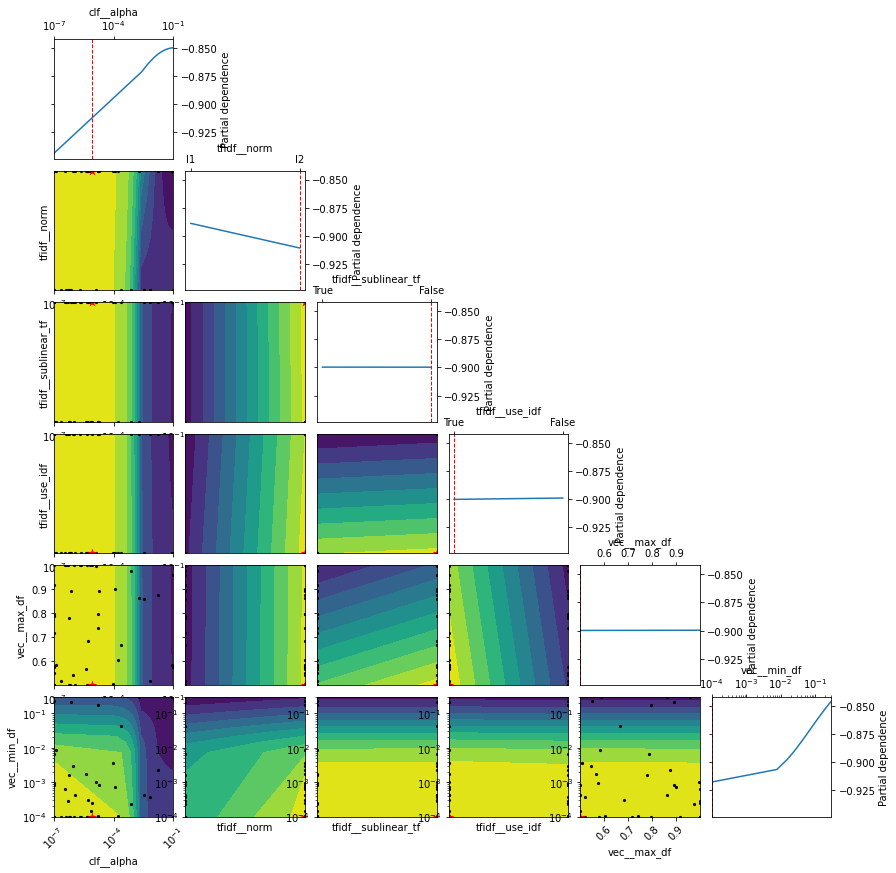

In [13]:
import matplotlib.pyplot as plt
from skopt.plots import plot_objective

_ = plot_objective(opt.optimizer_results_[0])
plt.show()

In [14]:
pipe.set_params(**opt.best_params_)
pipe.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 CountVectorizer(max_df=0.5, min_df=0.0001, ngram_range=(1, 2),
                                 preprocessor=<function <lambda> at 0x7fa2275d4f70>,
                                 tokenizer=<function <lambda> at 0x7f9f48194d30>)),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=8.06451734335902e-06))])

In [15]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_train_pred)
print("Train:")
print(report)
report = classification_report(y_test, y_test_pred)
print("Test:")
print(report)

Train:
              precision    recall  f1-score   support

    negative       0.94      0.90      0.92     24766
    positive       0.99      0.99      0.99    223624

    accuracy                           0.98    248390
   macro avg       0.96      0.95      0.95    248390
weighted avg       0.98      0.98      0.98    248390

Test:
              precision    recall  f1-score   support

    negative       0.90      0.86      0.88      8256
    positive       0.98      0.99      0.99     74541

    accuracy                           0.98     82797
   macro avg       0.94      0.92      0.93     82797
weighted avg       0.98      0.98      0.98     82797



Set Population: 248390
Accuracy: 0.9837


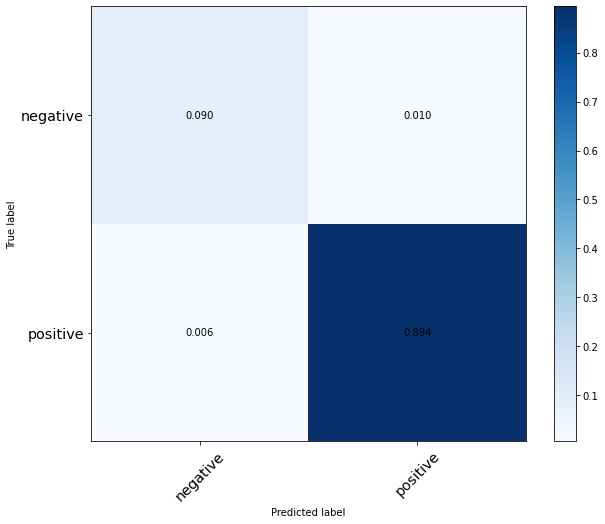

Set Population: 82797
Accuracy: 0.9765


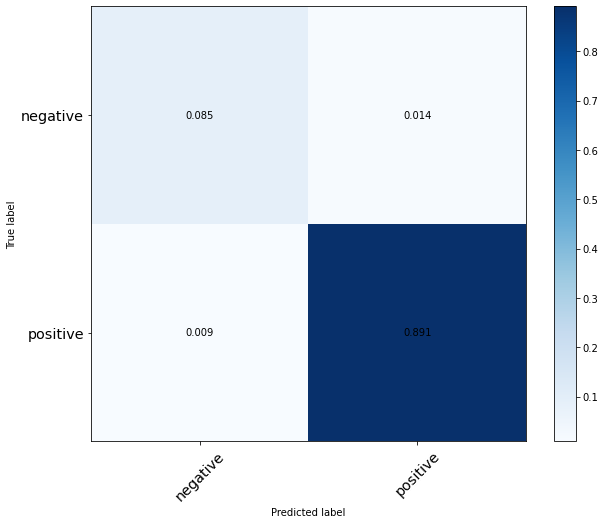

In [22]:
from fhnw.nlp.utils.ploting import plot_confusion_matrix

plot_confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(y_test, y_test_pred)